# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet, or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 


Following is to show how to plot to a file to save a graph:

In [2]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [1]:
#librarias
library(tree)
library(ggplot2)
#library(e1071)
#library(ggplot2)
#library(scales)
#library(grid)
#library(RColorBrewer)
library(dplyr)
library(tidyr)
library(lubridate)
library(caret)
library(ggmap)

apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: lattice
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [2]:
# Read your data here; 
nycab<-read.csv('AB_NYC_2019.csv', sep = ",")
nycab1<-
nycab%>%
    subset(select=-c(name))%>%
    filter(availability_365>330, price<3000)%>%
    mutate(projected_rev=price*(availability_365*.7))
    #merge( x = nycagg, y = nyc[c("date", "value")], by = "value", all = FALSE )
# Clean it up, reformat it, filter it, sort it, group it, etc.

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
# <- ALL YOUR CODE HERE ->

In [87]:
head(nycab1)

id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,projected_rev
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>
2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,38069.5
2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,55912.5
3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,,NA,1,365,38325.0
6021,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333,19813.5
8024,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,2019-07-01,1.09,6,347,31577.0
8025,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364,20384.0


In [12]:
summary(nycab1)

       id              host_id                 host_name   
 Min.   :    2539   Min.   :     2787   Sonder (NYC): 156  
 1st Qu.: 9919728   1st Qu.: 12243051   Kara        :  87  
 Median :21972403   Median : 55457305   Ken         :  67  
 Mean   :20580718   Mean   : 94737439   Sergii      :  66  
 3rd Qu.:31797655   3rd Qu.:181092484   John        :  56  
 Max.   :36483152   Max.   :274307600   Blueground  :  50  
                                        (Other)     :5167  
    neighbourhood_group            neighbourhood     latitude    
 Bronx        : 222     Bedford-Stuyvesant: 379   Min.   :40.50  
 Brooklyn     :1857     Hell's Kitchen    : 327   1st Qu.:40.69  
 Manhattan    :2535     Midtown           : 311   Median :40.73  
 Queens       : 941     Bushwick          : 252   Mean   :40.73  
 Staten Island:  94     Harlem            : 247   3rd Qu.:40.76  
                        Williamsburg      : 221   Max.   :40.91  
                        (Other)           :3912           

In [3]:
nycsales<-read.csv('NYC SALES DATA 2019.csv', sep = ",")
#nycsales1<-
#nycsales%>%
    #subset(select=-c(name))%>%
    #filter(availability_365>330, price<3000)%>%
    #mutate(projected_rev=price*availability_365)

head(nycsales)

BOROUGH,ADDRESS,APARTMENT.NUMBER,ZIP.CODE,RESIDENTIAL.UNITS,COMMERCIAL.UNITS,TOTAL.UNITS,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,YEAR.BUILT,TAX.CLASS.AT.TIME.OF.SALE,BUILDING.CLASS.AT.TIME.OF.SALE,SALE.PRICE,SALE.DATE
<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
Bronx,418 EAST 180 STREET,,10457,1,0,1,"1,568","1,526",1899,1,A5,0,7/9/2020
Bronx,4455 PARK AVENUE,,10457,1,0,1,"1,622","1,587",1899,1,A1,"458,000",1/31/2020
Bronx,4451 PARK AVENUE,,10457,1,0,1,"1,646","1,495",1899,1,A1,"475,000",7/23/2020
Bronx,4451 PARK AVENUE,,10457,1,0,1,"1,646","1,495",1899,1,A1,"275,000",3/16/2020
Bronx,2327 WASHINGTON AVENUE,,10458,1,0,1,"1,095","1,260",1910,1,A9,"110,000",12/6/2019
Bronx,2327 WASHINGTON AVE,,10458,1,0,1,"1,095","1,260",1910,1,A9,"165,000",3/2/2020


In [63]:
nycs1<-
na.omit(nycsales)%>%
    mutate(SALE.PRICE=as.numeric(gsub(",", "", SALE.PRICE)))
nycs<-
nycs1%>%
filter(COMMERCIAL.UNITS==0, SALE.PRICE >1000,TOTAL.UNITS==1)

head(nycs)


BOROUGH,ADDRESS,APARTMENT.NUMBER,ZIP.CODE,RESIDENTIAL.UNITS,COMMERCIAL.UNITS,TOTAL.UNITS,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,YEAR.BUILT,TAX.CLASS.AT.TIME.OF.SALE,BUILDING.CLASS.AT.TIME.OF.SALE,SALE.PRICE,SALE.DATE
<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<dbl>,<fct>
Bronx,4455 PARK AVENUE,,10457,1,0,1,"1,622","1,587",1899,1,A1,458000,1/31/2020
Bronx,4451 PARK AVENUE,,10457,1,0,1,"1,646","1,495",1899,1,A1,475000,7/23/2020
Bronx,4451 PARK AVENUE,,10457,1,0,1,"1,646","1,495",1899,1,A1,275000,3/16/2020
Bronx,2327 WASHINGTON AVENUE,,10458,1,0,1,"1,095","1,260",1910,1,A9,110000,12/6/2019
Bronx,2327 WASHINGTON AVE,,10458,1,0,1,"1,095","1,260",1910,1,A9,165000,3/2/2020
Bronx,2052 BATHGATE AVENUE,,10457,1,0,1,"2,340","1,516",1910,1,A1,289000,8/25/2020


In [64]:
aggregate(nycs[,13], list(nycs$BOROUGH), mean)

Group.1,x
<fct>,<dbl>
Bronx,535848.7
Brooklyn,969125.8
Manhattan,8698014.3
Queens,687128.1
Staten Island,563374.6


In [82]:
nycagg<-setNames(aggregate(nycs[,13], list(nycs$BOROUGH), mean),c('Borough','Avg_Sale_Price_2019'))

nycrates<-
nycagg%>%
mutate(Down_Payment=Avg_Sale_Price_2019*.2, Monthly_Mortgage= ((Avg_Sale_Price_2019-Down_Payment)*((.0294/12)*((1+(.0294/12))^(12*30)))/(((1+(.0294/12))^(12*30)-1))),Yearly_Mortgage=Monthly_Mortgage*12)

nycrates

Borough,Avg_Sale_Price_2019,Down_Payment,Monthly_Mortgage,Yearly_Mortgage
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Bronx,535848.7,107169.7,1793.486,21521.83
Brooklyn,969125.8,193825.2,3243.664,38923.97
Manhattan,8698014.3,1739602.9,29112.253,349347.04
Queens,687128.1,137425.6,2299.818,27597.81
Staten Island,563374.6,112674.9,1885.615,22627.38


In [66]:
williamsburg<-read.csv('Williamsburg.csv', sep = ",")

ws<-
na.omit(williamsburg)%>%
    filter(COMMERCIAL.UNITS==0, SALE.PRICE!=0,TOTAL.UNITS==1)%>%
    mutate(SALE.PRICE=as.numeric(gsub(",", "", SALE.PRICE)))
summary(ws)

aggregate(ws[,11], list(nycs$NEIGHBORHOOD), mean)

#wsagg<-setNames(aggregate(ws[,11], list(nycs$NEIGHBORHOOD), mean),c('NEIGHBORHOOD','Avg_Sale_Price_2019'))


     BOROUGH                NEIGHBORHOOD RESIDENTIAL.UNITS COMMERCIAL.UNITS
 Brooklyn:6   WILLIAMSBURG-CENTRAL:0     Min.   :1         Min.   :0       
              WILLIAMSBURG-EAST   :4     1st Qu.:1         1st Qu.:0       
              WILLIAMSBURG-NORTH  :1     Median :1         Median :0       
              WILLIAMSBURG-SOUTH  :1     Mean   :1         Mean   :0       
                                         3rd Qu.:1         3rd Qu.:0       
                                         Max.   :1         Max.   :0       
                                                                           
  TOTAL.UNITS LAND.SQUARE.FEET GROSS.SQUARE.FEET   YEAR.BUILT  
 Min.   :1    1,190  :1        1,500  :1         Min.   :1899  
 1st Qu.:1    1,280  :1        1,542  :1         1st Qu.:1902  
 Median :1    1,500  :1        1,600  :1         Median :1920  
 Mean   :1    1,800  :1        1,890  :1         Mean   :1932  
 3rd Qu.:1    1,850  :1        2,325  :1         3rd Qu.:1945  
 Max.   

ERROR: Error in aggregate.data.frame(as.data.frame(x), ...): arguments must have same length


In [78]:
nycabs<-merge(nycab1,nycrates,by.x='neighbourhood_group',by.y='Borough')
#head(nycabs)

nycabs1<-
nycabs%>%
filter(room_type=='Entire home/apt')%>%
mutate(yearly_projected_profit=projected_rev-Yearly_Mortgage, Years_to_Break_Even=Down_Payment/yearly_projected_profit,is_profitable= ifelse(yearly_projected_profit > 0,1,0))
head(nycabs1)

nycabs2<-
nycabs1%>%
mutate(is_profitable= ifelse(yearly_projected_profit > 0,1,0))


neighbourhood_group,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,⋯,calculated_host_listings_count,availability_365,projected_rev,Avg_Sale_Price_2019,Down_Payment,Monthly_Mortgage,Yearly_Mortgage,yearly_projected_profit,Years_to_Break_Even,is_profitable
<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bronx,34903861,126614438,Jada,Westchester Square,40.83616,-73.84638,Entire home/apt,75,1,⋯,1,355,18637.5,535848.7,107169.7,1793.486,21521.83,-2884.326,-37.155899,0
Bronx,29966192,221442773,Carlos & Vielca,Pelham Bay,40.84391,-73.83171,Entire home/apt,99,2,⋯,1,360,24948.0,535848.7,107169.7,1793.486,21521.83,3426.174,31.279716,1
Bronx,36080023,188453457,Denise,Claremont Village,40.84218,-73.90969,Entire home/apt,390,2,⋯,2,348,95004.0,535848.7,107169.7,1793.486,21521.83,73482.174,1.458445,1
Bronx,32161408,131995652,Henry,Mount Hope,40.84994,-73.90660,Entire home/apt,148,3,⋯,1,358,37088.8,535848.7,107169.7,1793.486,21521.83,15566.974,6.884430,1
Bronx,35428298,266627618,Charlene,Wakefield,40.90260,-73.84806,Entire home/apt,288,2,⋯,1,346,69753.6,535848.7,107169.7,1793.486,21521.83,48231.774,2.221974,1
Bronx,33661568,253698437,H,Williamsbridge,40.88171,-73.85384,Entire home/apt,75,2,⋯,1,360,18900.0,535848.7,107169.7,1793.486,21521.83,-2621.826,-40.875986,0


In [84]:
setNames(aggregate(nycabs1[,21], list(nycabs1$neighbourhood_group), mean),c('Borough','Avg_Profit'))

Borough,Avg_Profit
<fct>,<dbl>
Bronx,22323.14
Brooklyn,23007.72
Manhattan,-277989.73
Queens,28905.99
Staten Island,28797.30


In [10]:
nycprof<-
nycabs1%>%
filter(yearly_projected_profit>0,Years_to_Break_Even<=10)

summary(nycprof)

    neighbourhood_group       id              host_id            host_name  
 Bronx        : 32      Min.   :   16595   Min.   :     7351   Mark   :  6  
 Brooklyn     :213      1st Qu.: 8719470   1st Qu.:  8253356   Andrew :  5  
 Manhattan    :  5      Median :22136456   Median : 53611252   David  :  5  
 Queens       :111      Mean   :20728924   Mean   : 98160059   Adela  :  4  
 Staten Island: 13      3rd Qu.:33875986   3rd Qu.:201958668   Ali    :  4  
                        Max.   :36457700   Max.   :273108831   Jay    :  4  
                                                               (Other):346  
            neighbourhood    latitude       longitude     
 Williamsburg      : 62   Min.   :40.57   Min.   :-74.14  
 Bedford-Stuyvesant: 27   1st Qu.:40.68   1st Qu.:-73.96  
 Bushwick          : 18   Median :40.70   Median :-73.94  
 Crown Heights     : 17   Mean   :40.71   Mean   :-73.92  
 Greenpoint        : 15   3rd Qu.:40.73   3rd Qu.:-73.89  
 Long Island City  : 15   Max.

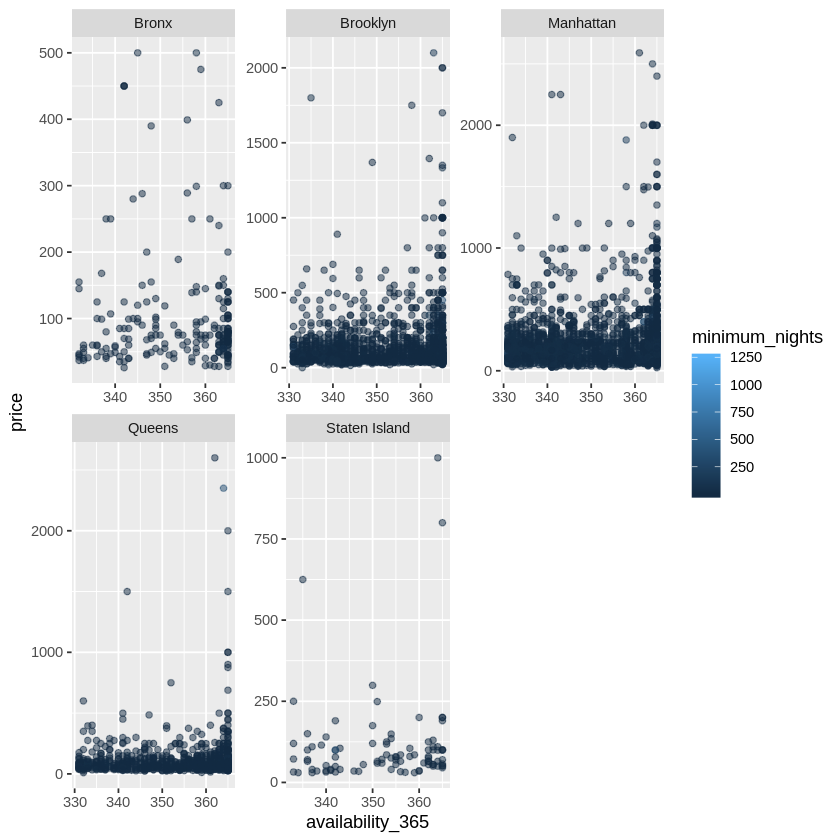

In [107]:
plot1 <-ggplot(data = nycab1,aes(x=availability_365,y=price, color=minimum_nights))+
    geom_point(alpha=.5) + facet_wrap(.~neighbourhood_group,scale='free')

plot1

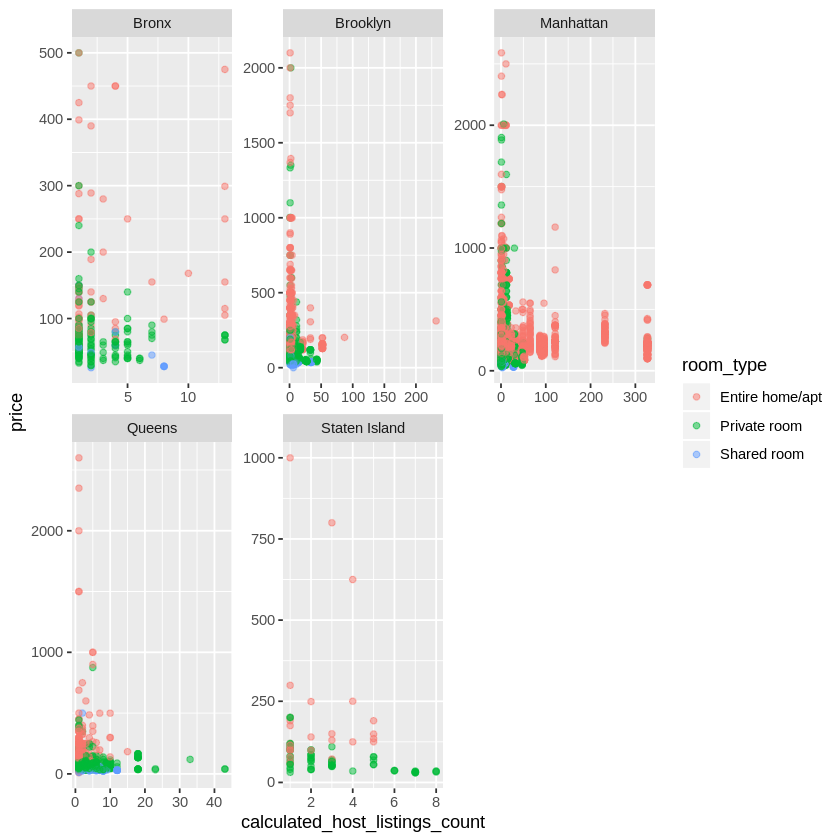

In [108]:
plot2 <-ggplot(data = nycab1,aes(x=calculated_host_listings_count,y=price, color=room_type))+
    geom_point(alpha=.5)+ facet_wrap(.~neighbourhood_group,scale='free')

plot2

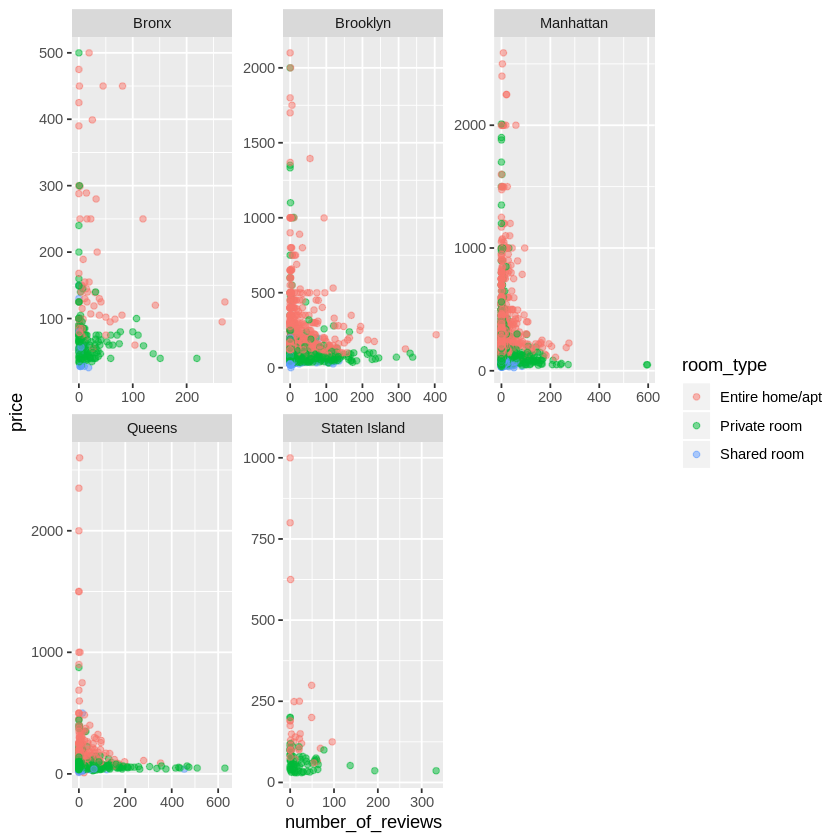

In [27]:
plot3 <-ggplot(data = nycab1,aes(x=number_of_reviews,y=price, color=room_type))+
    geom_point(alpha=.5)+ facet_wrap(.~neighbourhood_group,scale='free')

plot3

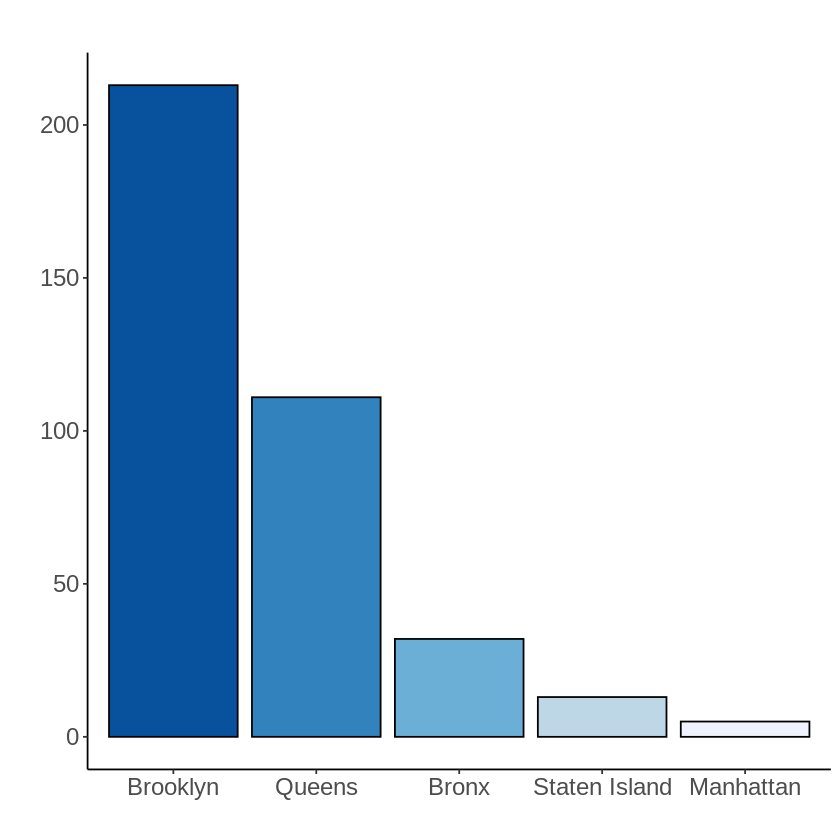

In [87]:
#nycprof$is_profitable <- factor(nycprof$is_profitable, levels = nycprof$neighbourhood_group[order(c('Brooklyn','Queens','Bronx','Staten Island','Manhatten'))])
Boroughs<- factor(nycprof$neighbourhood_group, levels = c('Brooklyn','Queens','Bronx','Staten Island','Manhattan'))
plot5 <-ggplot(data = nycprof,aes(is_profitable))+
    geom_bar(aes(Boroughs,fill=Boroughs),position="dodge",color='black')+
    scale_fill_brewer(palette = "Blues",direction = -1)+
    labs(title ="", x = "", y = "") +
    #ggtitle("Profitable Single-Unit Residences by Borough")+
    theme_classic()+
    theme(legend.position="None",text = element_text(size=18))


plot5

In [40]:
# Get the Google Map tile at zoom level 7 for Fort Worth, Texas

NY <- suppressMessages(get_map("New York", zoom=11))



# Create a map from it, slightly whiten it. 

NYmap <- ggmap(NY, extent = "device", darken = c(.2,"white"))

In [16]:
# Get the Google Map tile at zoom level 7 for Fort Worth, Texas

BNY <- suppressMessages(get_map("Williamsburg,New York", zoom=13))



# Create a map from it, slightly whiten it. 

BNYmap <- ggmap(BNY, extent = "device", darken = c(.2,"white"))

Warning message:
“Removed 202 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 202 rows containing non-finite values (stat_density2d).”

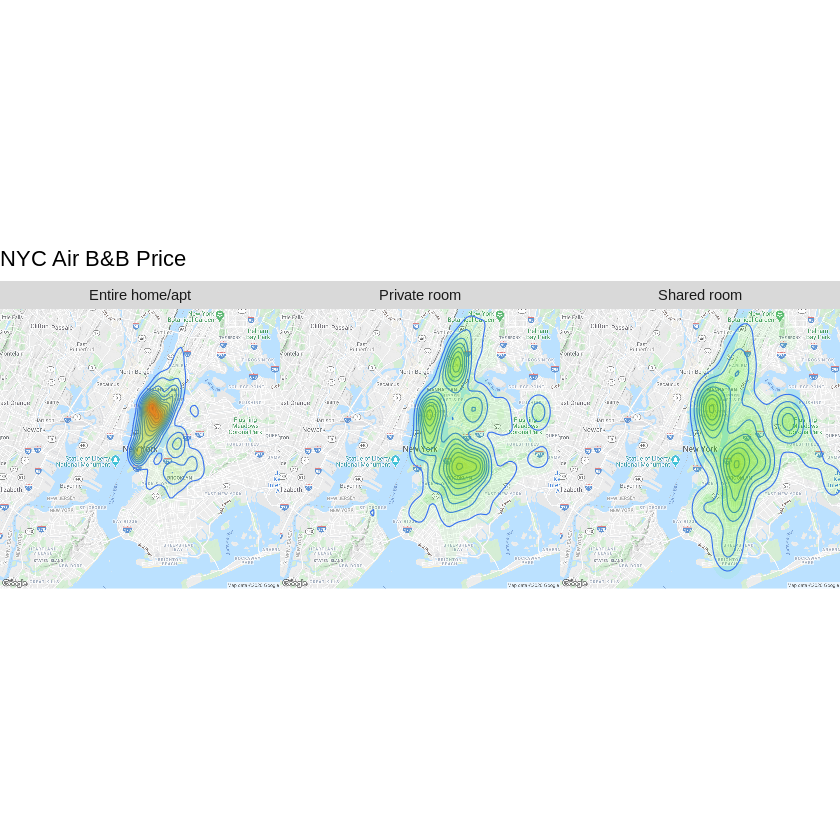

In [53]:
# Draw the map first 
NYmap +

# add levels 
geom_density2d(data = nycab1, aes(x = longitude, y = latitude), size = 0.3) + 

# add density heat map
stat_density2d(data= nycab1, aes(x = longitude, y = latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

# color scale 
scale_fill_gradient("rentals",low = "green", high = "red") + 

scale_alpha(range = c(0.05, 0.2), guide = FALSE) +

# add store locations here so that they are on top 
#geom_point(data=nycab1, aes(x = longitude, y = latitude), color='blue',alpha=0.7) +

#facet_wrap(.~neighbourhood_group)+
facet_wrap(.~room_type)+

# remove the legend 
theme(legend.position="None") + 

# add title
ggtitle("NYC Air B&B Price")

Warning message:
“Removed 181 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 181 rows containing non-finite values (stat_density2d).”

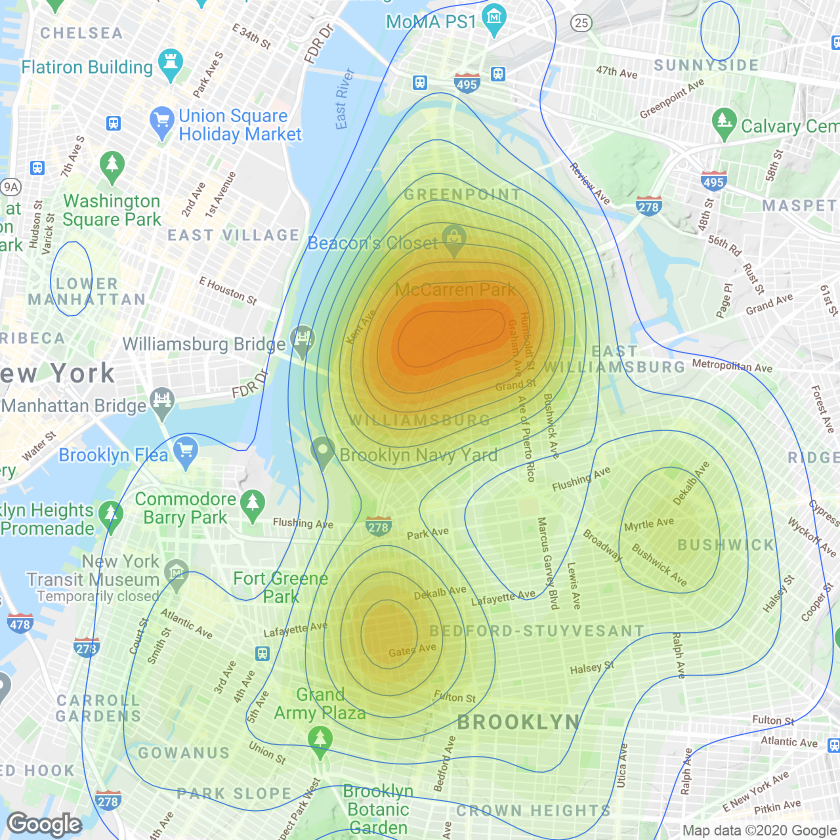

In [74]:
# Draw the map first 
BNYmap +

# add levels 
geom_density2d(data = nycprof, aes(x = longitude, y = latitude), size = 0.3) + 

# add density heat map
stat_density2d(data= nycprof, aes(x = longitude, y = latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

# color scale 
scale_fill_gradient("",low = "green", high = "red",labels=NULL ) + 

scale_alpha(range = c(0.05, 0.2), guide = FALSE) +

# add store locations here so that they are on top 
#geom_point(data=nycprof, aes(x = longitude, y = latitude,color=Years_to_Break_Even),alpha=0.7) + 

#scale_fill_gradient(low = "green",high = "red",name="Years to Break Even")+

#facet_wrap(.~neighbourhood_group)+
#facet_wrap(.~room_type)+

# remove the legend 
theme(legend.position="None")

# add title
#ggtitle("NYC Air B&B Profitable")

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message:
“Removed 181 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 181 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 181 rows containing missing values (geom_point).”Warning message:
“Removed 181 rows containing missing values (geom_point).”

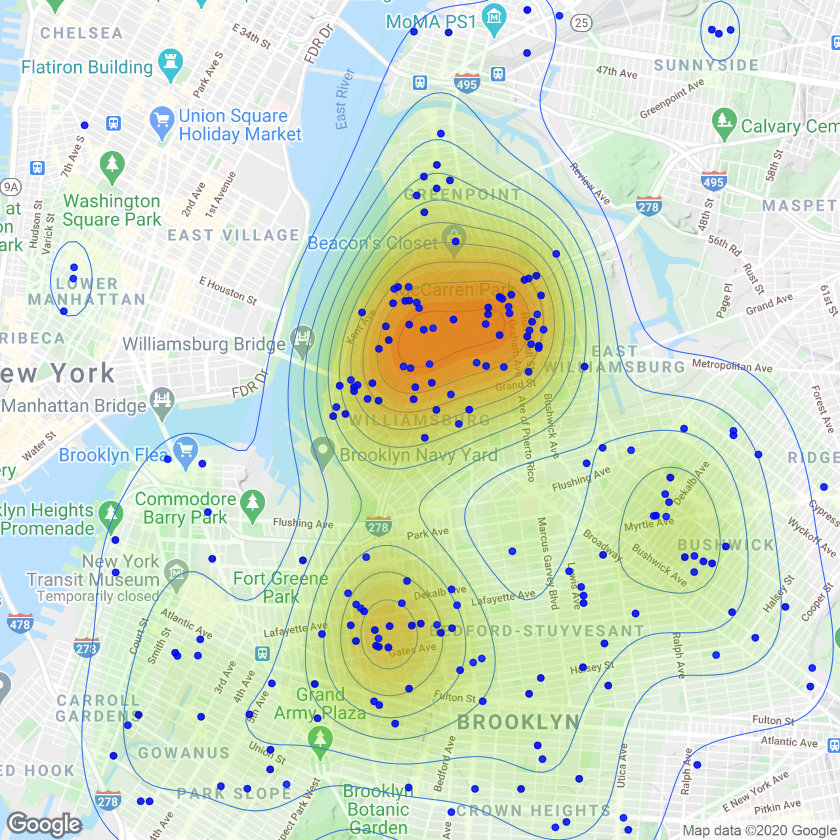

In [22]:
# Draw the map first 
BNYmap +
geom_density2d(data = nycprof, aes(x = longitude, y = latitude), size = 0.3) + 

# add density heat map
stat_density2d(data= nycprof, aes(x = longitude, y = latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

# color scale 
scale_fill_gradient("rentals",low ="green", high = "red")+ 

scale_alpha(range = c(0.05, 0.2), guide = FALSE) +

# add store locations here so that they are on top 
geom_point(data=nycprof, aes(x = longitude, y = latitude,color=Years_to_Break_Even),alpha=0.7) + 

scale_fill_gradient(low = "green",high = "red",name="Years to Break Even")+

# add store locations here so that they are on top 
geom_point(data=nycprof, aes(x = longitude, y = latitude,color=Years_to_Break_Even),color='blue',alpha=0.7) + 

#scale_color_gradient(low = "green",high = "red",name="Years to Break Even")+

#facet_wrap(.~neighbourhood_group)+
#facet_wrap(.~room_type)+

# remove the legend 
theme(legend.position="None") 

# add title
#ggtitle("NYC Air B&B Profitable")

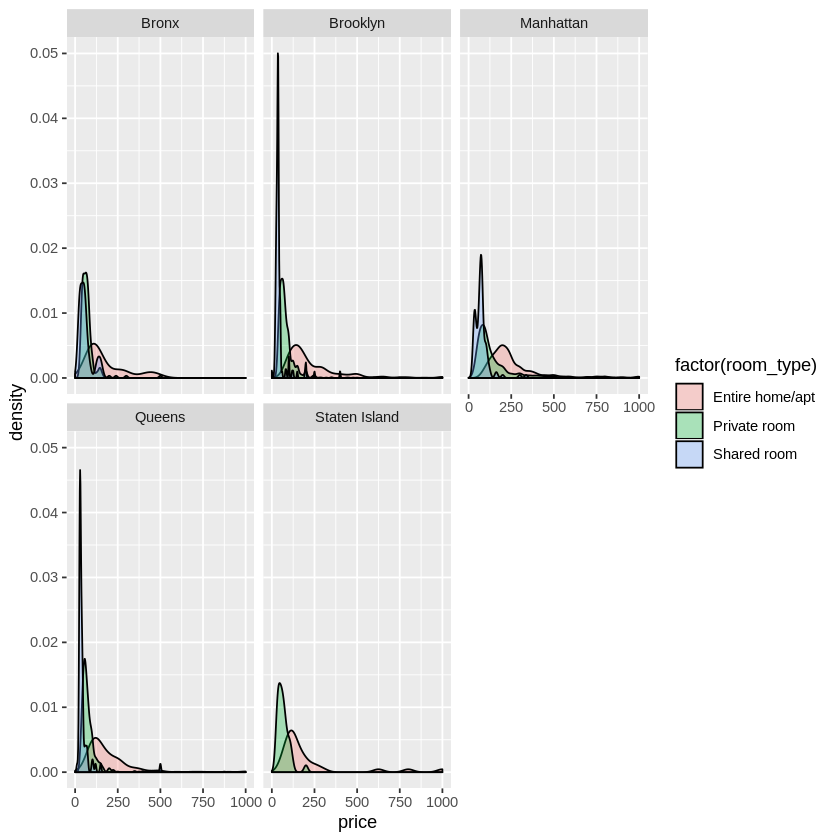

In [58]:
lowcost<-nycab1[nycab1$price<1001,]

ggplot(lowcost , aes(x=price, fill=factor(room_type))) + geom_density(alpha=0.3)+facet_wrap(.~neighbourhood_group)

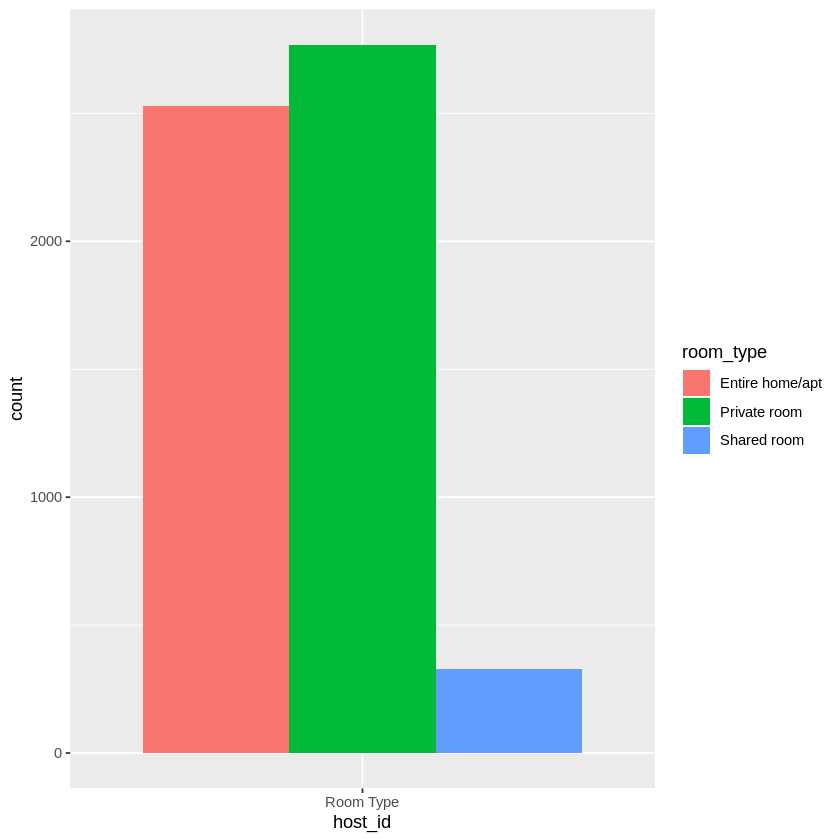

In [66]:
plot4 <-ggplot(data = nycab1,aes(host_id))+
    geom_bar(aes('Room Type',fill=room_type), position="dodge") #+ facet_wrap(.~neighbourhood_group, scales="free")

plot4

---

# Common Pitfalls / Inefficiencies

**Pay attention to the following in your visualizations and stories:**


### Color coordinate among plots so that the same data attributes have the same color in all plots

you can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value. 


### Perceptual grouping is important! group and/or order values

In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

Pie chart: order wedges. 

In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 


### No lengthy text in x axis

Flip the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

at least put them slanted in x axis for better readibility. 


### Plot only those that tell an obvious story

**No crowded** scatter plots with useless linear regression lines that don't tell anything. Look at alternative plots to tell your story.


### If you have too many classes (discrete variables/categories), try to group them 

Instead of giving a color to each of them, you can put them in meaningful groups and color code.

For sequential variables, you can do the same thing by binning. 

Stepped color palettes may be more useful than smooth sequential palettes (especially for comparison in choropleth maps).

You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 


### ANNOTATE!

**Tell** your audience what they are supposed to see. 

Use meaningful titles with a message, not dry titles. 

Use nice and concise axis labels. 

Use text annotations (look at the **examples in the lab notebook**).



### THEMING!

**Good looking** charts are more **convincing**. 

**Almost NEVER use the default color palette, default theme, default font.**


Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 



### Use space wisely!

**Balance the plots** to use space effectively.

Pay attention to data-ink ratio.

HAVE A FLOW left to right, top to bottom. 


